In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
import numpy as np
%matplotlib inline
color = sns.color_palette()
sns.set(style="white")

In [2]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics.regression import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 

C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('limpo7.csv', sep=';',index_col=0)


C:\Users\Jessica\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:

df_dummies = pd.DataFrame()
for coluna in x_col:
    temp = pd.get_dummies(df[coluna], prefix=coluna)
    df_dummies = pd.concat([df_dummies, temp], axis=1)

In [9]:
df2 = pd.concat([df,df_dummies], axis=1)

,col_1.0,col_2.0,col_3.0,col_4.0,col_5.0,col_6.0,col_7.0,catr_0.0,catr_1.0,catr_2.0,...,dep_976,atm_1.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,atm_6.0,atm_7.0,atm_8.0,atm_9.0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
df2['grav1'] = ((df.grav == 2) | (df.grav == 3)).astype(int)

In [26]:
df2['secu2'] = df['secu'].apply(lambda x: int(x/10) if x>=10 else x)

In [27]:
df2['secu2'].value_counts()

1.0    1231559
2.0     399508
9.0     111747
0.0      67503
5.0      43356
3.0      14322
4.0       5472
Name: secu2, dtype: int64

# CREANDO O MODELO

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [30]:
x_col= df2.drop(['Num_Acc','grav1','secu2','an','mois','jour','hrmn','lum','agg','int','atm','col','com','dep','date','catu','grav','sexe','trajet','secu','locp','actp','etatp','an_nais','num_veh','secu1','catr','circ','vosp','prof','plan','lartpc','larrout','surf','infra','situ','env1','catv'
],axis=1)

In [31]:
y = df2['grav1']

In [48]:
x_col.head()

,col_1.0,col_2.0,col_3.0,col_4.0,col_5.0,col_6.0,col_7.0,catr_0.0,catr_1.0,catr_2.0,...,dep_976,atm_1.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,atm_6.0,atm_7.0,atm_8.0,atm_9.0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
# df2["idade"] = df.an - df.an_nais


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=0)

In [180]:
# zscore = StandardScaler().fit(X_train)
# x_train = zscore.transform(X_train)
# x_test = zscore.transform(X_test)

In [36]:
model = DecisionTreeClassifier(max_depth=12, max_features=5, random_state=42)
model.fit(X=x_train, y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

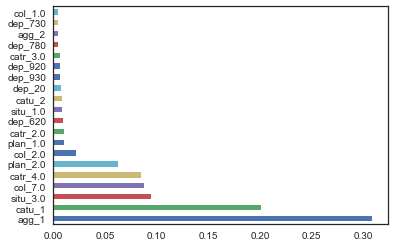

In [37]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')
plt.show()

In [184]:
# mse_tr = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))
# r2_tr = r2_score(y_true=y_train, y_pred=model.predict(x_train))

In [185]:
# mse_te = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))
# r2_te = r2_score(y_true=y_test, y_pred=model.predict(x_test))

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

def eval_auc(clf, x, y):
    ypred = clf.predict_proba(x)[:,1]
    return roc_auc_score(y, ypred)

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=12, max_features=5, random_state=42)
rf = RandomForestClassifier(max_depth=20, n_estimators=10)

clfs = [('LogR', lr),
        ('DT', dt),
        ('RF', rf)]

vot = VotingClassifier(clfs, voting='soft',n_jobs=-1)
vot.fit(x_train, y_train)

VotingClassifier(estimators=[('LogR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('DT', Decis...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

In [32]:
for name, clf in clfs:
    clf.fit(x_train, y_train)
    
    auc = eval_auc(clf, x_test, y_test)
    print(name, auc)
    
print()
print('all', eval_auc(vot, x_test, y_test))

LogR 0.6887301381540808
DT 0.8129308025377266
RF 0.8179911788124783

all 0.8157845471066235


In [44]:
p_train = vot.predict(x_train)
p_test = vot.predict(x_test)

C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
cnf_matrix = confusion_matrix(y_train, p_train)
print ("\n\n ---Base de Treinamento---")
print ("\n\n ---Matriz de Confusão---")
print(cnf_matrix)
print('Accuracy of model on test set: {:.2f}'.format(model.score(x_train, y_train)))

print ("\n\n ---VotingClassifier Model---")
vot_roc_auc2 = roc_auc_score(y_test, model.predict(x_test))
print ("VotClas AUC = %2.2f" % vot_roc_auc2)
print(classification_report(y_test, p_test))



 ---Base de Treinamento---


 ---Matriz de Confusão---
[[979551  21884]
 [264258  45733]]
Accuracy of model on test set: 0.77


 ---VotingClassifier Model---
VotClas AUC = 0.53
             precision    recall  f1-score   support

          0       0.79      0.98      0.87    428899
          1       0.66      0.14      0.24    133142

avg / total       0.76      0.78      0.72    562041

